## Ordinary Differential Equation

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### $I_{Kr}$ Markov Model

Reference: http://rudylab.wustl.edu/research/cell/methodology/markov/IKHTML/IKrmodel.htm

![img](img/IKR.png)

--------

In [49]:
def model_ikr(y,t,v):
    
    '''state representation:
       x[0] = C3, x[1] = C2, x[2] = C1
       x[3] = O, x[4] = I'''
    
    F=96485
    T=310
    R=8314
    k_o = 4.0
    
    '''define voltage dependent rate constant'''
    alpha2=1.31e-2*np.exp(1.48*v*F/(R*T))
    alpha1=2.17;
    alpha=3.02e-2*np.exp(1.48*v*F/(R*T))
    beta=2.90e-3*np.exp(-9.78e-1*v*F/(R*T))
    beta1=1.08
    beta2=3.30e-3*np.exp(-5.77e-1*v*F/(R*T))
    alphai=5.45e-1*np.exp(-8.17e-1*v*F/(R*T))*4.5/k_o
    betai=8.20e-1*np.exp(5.04e-1*v*F/(R*T))*(4.5/k_o)**0.3
    mu=(alphai*beta2)/betai

    '''define states'''
    c3=y[0]
    c2=y[1]
    c1=y[2]
    o=y[3]
    i=y[4]

    '''define simultaneous differential equations'''
    dc3dt=beta*c2-alpha*c3;
    dc2dt=beta1*c1+alpha*c3-(alpha1+beta)*c2;
    dc1dt=alpha1*c2+beta2*o+mu*i-(beta1+2*alpha2)*c1;
    dodt=alphai*i+alpha2*c1-(betai+beta2)*o;
    didt=alpha2*c1+betai*o-(mu+alphai)*i;
    
    '''prepare return vector'''
    dydt = [dc3dt,dc2dt,dc1dt,dodt,didt]
    return dydt

In [67]:
n = 40
T =10

# initial condition
y0 = [1,0,0,0,0]
v = np.linspace(-30,10,40)
YY = [y0]

y1,y2,y3,y4,y5 = [],[],[],[],[]

for i in range(len(v)):
    tspan = [t[i-1],t[i]]
    '''solve ODEs'''
    y = odeint(model_ikr,y0,tspan,args=(v[i],))
    
    y1.append(y[1][0])
    y2.append(y[1][1])
    y3.append(y[1][2])
    y4.append(y[1][3])
    y5.append(y[1][4])
    
    y0 = y[1]

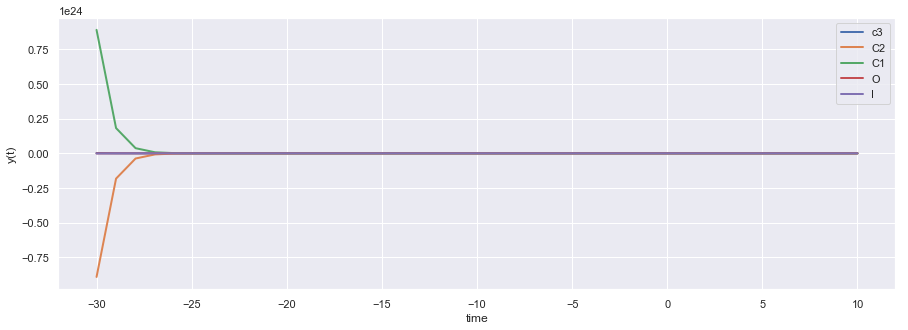

In [70]:
# plot results
plt.figure(figsize = [15,5])
plt.plot(v,y1,linewidth=2,label='c3')
plt.plot(v,y2,linewidth=2,label='C2')
plt.plot(v,y3,linewidth=2,label='C1')
plt.plot(v,y4,linewidth=2,label='O')
plt.plot(v,y5,linewidth=2,label='I')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()